In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
import numpy as np

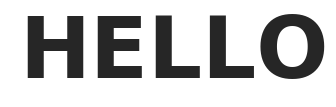

(-0.18834177887445108,
 4.170608682262019,
 0.012344421622247533,
 1.0156288071144302)

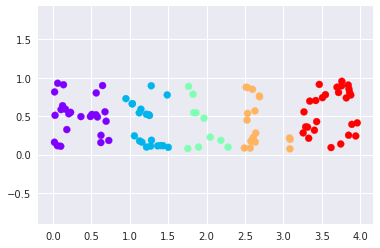

In [57]:
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4,1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis("off")
    ax.text(0.5, 0.4, "HELLO", va="center", ha="center", weight="bold", size=85)
    plt.show(fig)
    fig.savefig("hello.png")
    plt.close(fig)
    from matplotlib.image import imread
    data = imread("hello.png")[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

X = make_hello(100)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap("rainbow", 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis("equal")

(4.535022232081254, 8.827618049021536, 5.00834508669353, 7.3034417330574675)

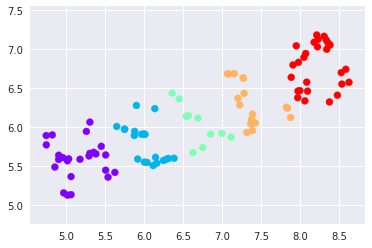

In [58]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]
    ]
    return np.dot(X, R)
X2 = rotate(X, 20) +5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis("equal")


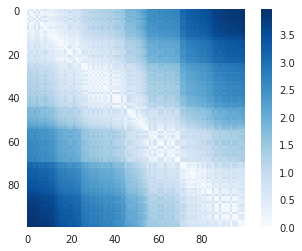

In [59]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape
plt.imshow(D, zorder=2, cmap="Blues", interpolation="nearest")
plt.colorbar()

True

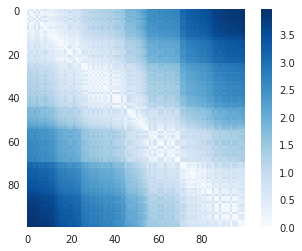

In [62]:
D2 = pairwise_distances(X2)
D2.shape
plt.imshow(D2, zorder=2, cmap="Blues", interpolation="nearest")
plt.colorbar()
np.allclose(D, D2)